In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import os

# Add the parent directory to sys.path
sys.path.append(os.path.abspath(os.path.join('..')))

In [53]:
# !wget https://raw.githubusercontent.com/InvalcreInc/parental-control-classification/refs/heads/main/data/toxic_comments.csv

## 1 Load Data
This section imports the Jigsaw Toxic Comment Classification dataset.

In [4]:
data = pd.read_csv("../data/toxic_comments.csv")
data.sample(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
98296,0dcf91f114e99be3,"""::::""""Sneer""""? That's not NPOV!!! (talk) \n\n""",0,0,0,0,0,0
108868,46118fd4b01c9517,I just want to thank the editors here for a br...,0,0,0,0,0,0
8057,157282532efe7f28,"the source, so that the ambiguity can be furth...",0,0,0,0,0,0
64168,abb8b37c41797012,Because the order cannot deny its arabic roots...,0,0,0,0,0,0
124510,9a15ac315f930118,"""\n\nRedirect from """"Emerson""""\nI recently mad...",0,0,0,0,0,0
4161,0b19986c6d9632ab,"""\n """"Diverse views"""" means editors with a var...",0,0,0,0,0,0
148767,51d2a25630cf0f53,"Oh, you are as serious as a heart-attack.",1,0,0,0,0,0
46663,7cb7f0d6df9ca841,"""\n Speedy deletion of """"John falls"""" \n\n A p...",0,0,0,0,0,0
76860,cdd34638e7b0bf08,"Again, this is normal for this type of list. L...",0,0,0,0,0,0
61685,a514c5141c533a49,"""\n\n category tracker \n\nHello Dragons fligh...",0,0,0,0,0,0



## 2 Data Analysis (Understanding the Data)
This section explores the Jigsaw dataset to gain insights into its structure and characteristics for effective toxic comment classification. It calculates summary statistics (e.g., comment length, label counts), visualizes the distribution of safe vs. toxic labels, generates word clouds to identify frequent terms in safe and toxic comments, checks for duplicates and missing values, and analyzes multi-label correlations (e.g., toxic with obscene) to inform preprocessing and model design.


In [5]:
data.shape

(159571, 8)

In [9]:
data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   comment_text   159571 non-null  object
 1   toxic          159571 non-null  int64 
 2   severe_toxic   159571 non-null  int64 
 3   obscene        159571 non-null  int64 
 4   threat         159571 non-null  int64 
 5   insult         159571 non-null  int64 
 6   identity_hate  159571 non-null  int64 
 7   label          159571 non-null  object
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


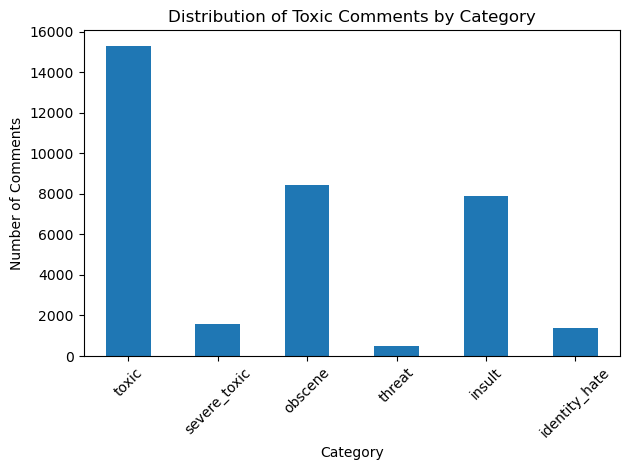

In [11]:
# Calculate the sum of each toxicity type
toxicity_counts = data.drop(["id", "comment_text"], axis=1).sum()

# Create bar plot
toxicity_counts.plot(kind='bar')
plt.title('Distribution of Toxic Comments by Category')
plt.xlabel('Category')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()

In [10]:
from wordcloud import WordCloud

def generate_word_cloud(text:str):
    wordcloud = WordCloud(width=800, height=400,
                        background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt

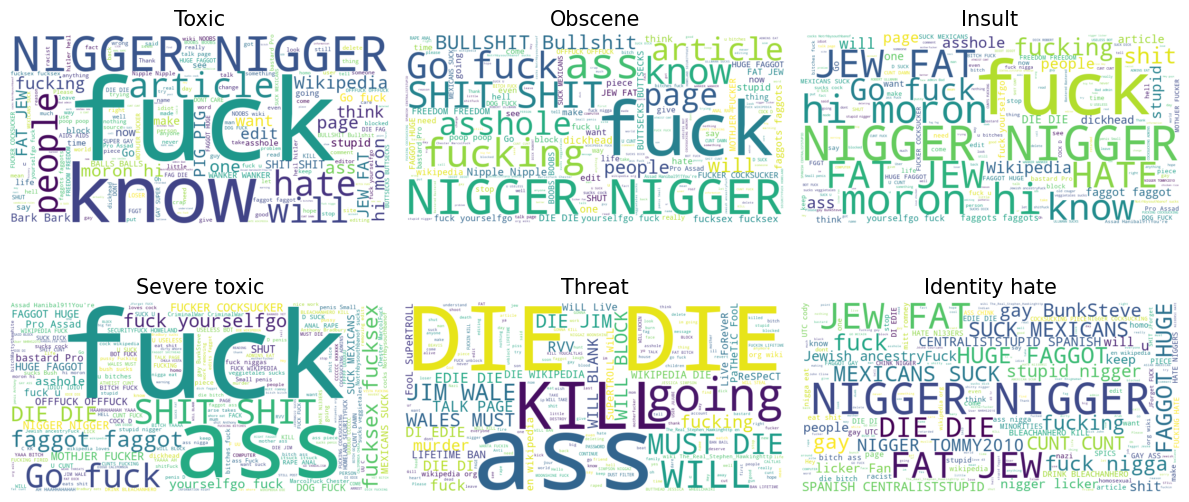

In [18]:
label_columns = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
rows = len(label_columns)//3
fig,axs = plt.subplots(rows,3, figsize=(12,6))

for i, col in enumerate(label_columns):
    ax = axs[i%2,i//2]
    text = ' '.join(data[data[col]==1]['comment_text'])
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white').generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(col.replace("_", " ").capitalize(), fontsize=15)

plt.tight_layout()
plt.show()
    

## 2 Data Cleaning
This section removes duplicate rows and unwanted columns from the dataset, preparing clean data for toxic comment classification. It eliminates duplicate comments, drops the 'id' column, and retains comment_text and toxicity labels (toxic, severe_toxic, obscene, threat, insult, identity_hate). Multi-labels are converted to binary ('safe' or 'toxic'), text is preprocessed by lowercasing and removing special characters, and missing values are handled to ensure a consistent dataset for model training.

In [ ]:
data = data.dropna()

In [20]:
data=data.drop("id", axis=1)

In [21]:

data['label'] = data.drop(['comment_text'], axis=1).sum(axis=1)
data['label'] = data['label'].apply(lambda x: "toxic" if x >= 1 else "safe")
data.sample(5)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,label
56437,- [[User:\nEseki|Eseki]] ([[Wikipedia:Editor ...,0,0,0,0,0,0,safe
63615,am trying to shed some light on british ignorance,0,0,0,0,0,0,safe
8075,the Public Policy Initiative Assessment Team w...,0,0,0,0,0,0,safe
62064,"The Electrolux Timeline at states Kelvinator,...",0,0,0,0,0,0,safe
117673,and I will always stick to the rules,0,0,0,0,0,0,safe


In [61]:
# !wget https://raw.githubusercontent.com/InvalcreInc/parental-control-classification/refs/heads/main/modules/preprocess_text.py

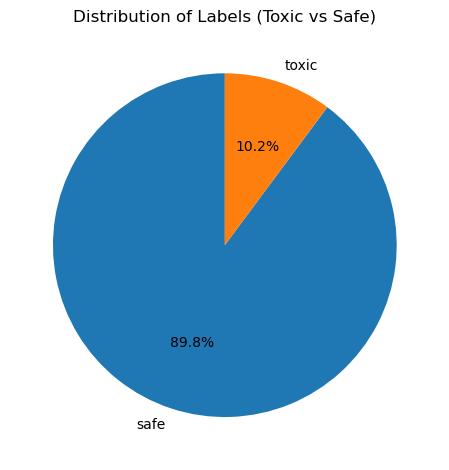

In [22]:
# Labels distribution
label_counts = data['label'].value_counts()
# plt.figure(figsize=(6, 4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Labels (Toxic vs Safe)')
plt.tight_layout()
plt.show()


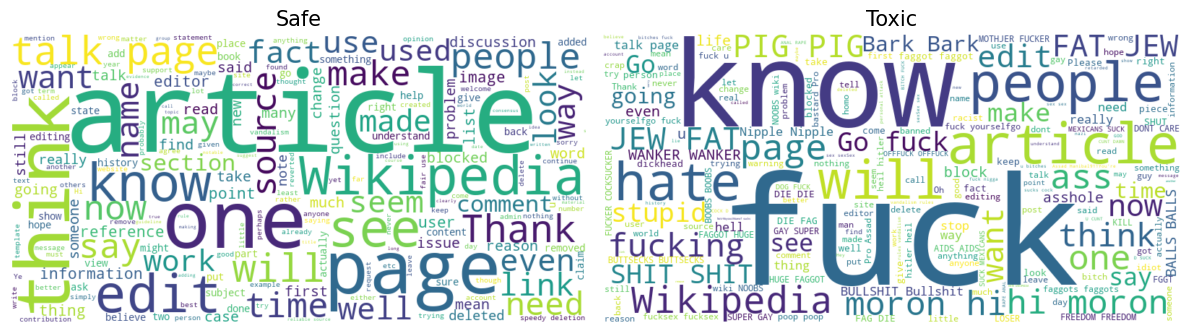

In [29]:
label_columns = ["safe", "toxic"]
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

for i, col in enumerate(label_columns):
    ax = axs[i]
    text = ' '.join(data[data["label"] == col]['comment_text']).replace("NIGGER","")
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white').generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(col.replace("_", " ").capitalize(), fontsize=15)

plt.tight_layout()
plt.show()

In [63]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')


def preprocess_text(text: str) -> str:
    '''
    Preprocesses the given text by converting it to lowercase, removing special characters, removing extra whitespaces, and removing stopwords.
    '''
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = re.sub(r'[^\w\s!?.,;]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = ' '.join([word for word in text.split()
                     if word not in stop_words])
    return text


if __name__ == "__main__":
    text = "Hello, how are you? This is a sample text."
    print(preprocess_text(text))

hello, you? sample text.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:

data['comment_text'] = data['comment_text'].apply(preprocess_text)
data.sample(5)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,label
73000,cracked think james kass cracked phrozen crew;...,0,0,0,0,0,0,safe
136285,"interesting claim, sort witch hunt. particular...",0,0,0,0,0,0,safe
27698,"seems show first two are, third intentional, u...",0,0,0,0,0,0,safe
145856,person banned persistent vandalism probably so...,0,0,0,0,0,0,safe
65827,address blocked 48 hours used evasion existing...,0,0,0,0,0,0,safe


## 3 Oversample Toxic Data
This section addresses class imbalance in the Jigsaw dataset, where safe comments outnumber toxic ones, to improve toxic comment detection. It applies oversampling techniques (e.g., SMOTE or random oversampling) to achieve a balanced dataset, validates the oversampled data to prevent overfitting or synthetic noise, and logs the new class distribution to confirm balance for robust model training.

In [79]:
toxic_data = data[data['label'] == 'toxic']
safe_data = data[data['label'] == 'safe']
oversampled_toxic = toxic_data.sample(n=len(safe_data)//2, replace=True)
balanced_data = pd.concat([safe_data,toxic_data, oversampled_toxic])

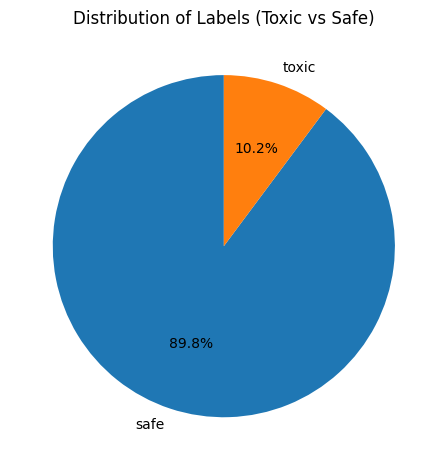

In [80]:
label_counts = balanced_data['label'].value_counts()
# plt.figure(figsize=(6, 4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Labels (Toxic vs Safe)')
plt.tight_layout()
plt.show()

## 4 Model Training
This section trains a FastText supervised classifier for binary text classification (safe vs. toxic) to flag harmful content for parental controls
### 4.1 FastText Methodology

FastText represents text and labels as vectors, training a linear classifier to align text vectors with their corresponding label vectors (e.g., safe or toxic). The actual model fastText implements is rather simple as we can see in the image below:

$$ - \frac{1}{N} \sum\ y_n \log(f(BAd_n)) $$

where

- $d_n$ is the representation of the $n$-th document (denoted `hidden` in the image below)
- $A$ is the "document" embedding matrix
- $B$ is the linear projection from "document" embeddings to output classes
- $f$ is the `softmax` non-linearity function
- $y_n$ is the label of the $n$-th document

In [67]:
def format_for_fasttext(row):
    return f'__label__{row["label"]} {row["comment_text"]}'

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, ConfusionMatrixDisplay
# Split data (70% train, 20% val, 10% test)
train, temp = train_test_split(balanced_data, test_size=0.3, random_state=42)
val, test = train_test_split(temp, test_size=0.33, random_state=42)
train.shape, val.shape, test.shape

((161870, 8), (46480, 8), (22894, 8))

In [76]:
# Save train/val/test files
with open('train.txt', 'w', encoding='utf-8') as f:
    for _, row in train.iterrows():
        f.write(format_for_fasttext(row) + '\n')

with open('val.txt', 'w', encoding='utf-8') as f:
    for _, row in val.iterrows():
        f.write(format_for_fasttext(row) + '\n')

with open('test.txt', 'w', encoding='utf-8') as f:
    for _, row in test.iterrows():
        f.write(format_for_fasttext(row) + '\n')

In [45]:
import fasttext
# 4. Train fastText model
model = fasttext.train_supervised(
    input='train.txt',
    lr=0.1,
    epoch=25,
    wordNgrams=2,
    dim=100,
    loss='softmax',
    thread=4
)

## 5 Model Evaluation
This section assesses the FastText model’s performance on an 80:20 train-test split of the Jigsaw dataset, focusing on toxic comment detection. It computes accuracy, precision, recall, and F1-score, generates a confusion matrix to visualize safe vs. toxic classification errors, plots label distribution to confirm balanced classes, creates word clouds to highlight safe and toxic linguistic patterns, and exports results (metrics, plots) to reports/charts/ for parental control system reporting.

Precision: 0.9604, Recall: 0.9604, Samples: 22894
              precision    recall  f1-score   support

        safe       0.94      1.00      0.97     14206
       toxic       1.00      0.90      0.95      8688

    accuracy                           0.96     22894
   macro avg       0.97      0.95      0.96     22894
weighted avg       0.96      0.96      0.96     22894



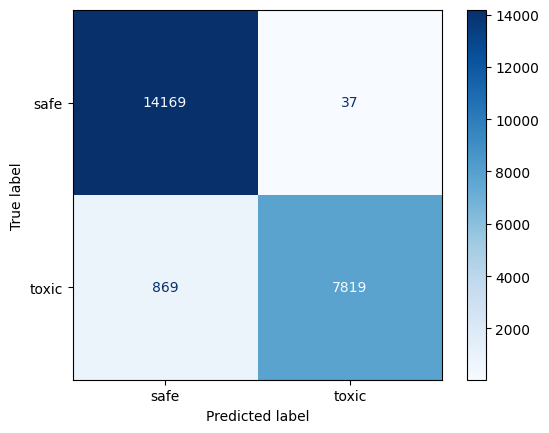

In [77]:
def evaluate_model(model, test_file):
    """Evaluate model on test set."""
    result = model.test(test_file)
    print(
        f"Precision: {result[1]:.4f}, Recall: {result[2]:.4f}, Samples: {result[0]}")

    # Detailed classification report
    test_texts = [line.strip().split(' ', 1)[1]
                  for line in open(test_file, 'r', encoding='utf-8')]
    test_labels = [line.strip().split(' ', 1)[0].replace('__label__', '')
                   for line in open(test_file, 'r', encoding='utf-8')]
    pred_labels=[]
    for text in test_texts:
      label,_ = model.predict(text)
      pred_labels.append(label[0].replace('__label__', ''))


    print(classification_report(test_labels, pred_labels))
    classes = ['safe', 'toxic']
    cm = confusion_matrix(test_labels, pred_labels, labels=classes)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

evaluate_model(model, 'test.txt')

Otpuna

In [47]:
def objective(trial):
    # Suggest hyperparameters
    lr = trial.suggest_loguniform('lr', 0.01, 0.5)
    epoch = trial.suggest_int('epoch', 5, 25)
    wordNgrams = trial.suggest_int('wordNgrams', 1, 3)
    dim = trial.suggest_categorical('dim', [50, 100, 200])

    # Train FastText model
    model = fasttext.train_supervised(
        input='train.txt',
        lr=lr,
        epoch=epoch,
        wordNgrams=wordNgrams,
        dim=dim,
        loss='softmax',
        thread=4
    )

    # Evaluate the model on the validation set
    y_val_true = val['label'].apply(lambda x: x.replace('__label__', ''))
    y_val_pred = [model.predict(text)[0][0].replace('__label__', '') for text in val['comment_text']]

    accuracy = accuracy_score(y_val_true, y_val_pred)
    class_report = classification_report(y_val_true, y_val_pred)
    return accuracy, class_report

In [48]:
model.save_model("toxic_comments_model.bin")